In [336]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import os

In [337]:
#Function to import data from csv
def load_housing_data(housing_path="CaliforniaHousing"):
    csv_path=os.path.join(housing_path, "cal_housing.csv")
    return pd.read_csv(csv_path)

In [338]:
#Calling teh function to import data
housing= load_housing_data()

In [339]:
#Display the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [340]:
#Display description of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [341]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


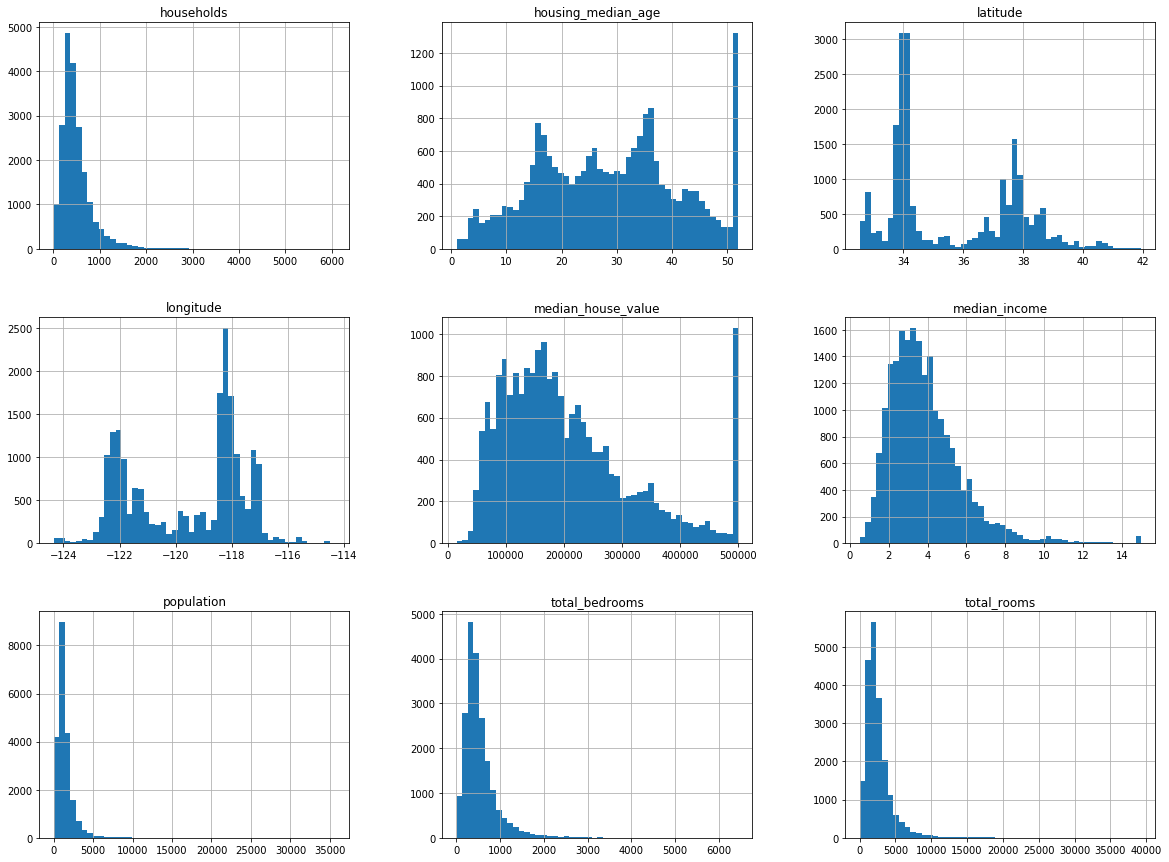

In [342]:
#Histogram of data
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [343]:
np.random.seed(123)

In [344]:
# Split data from train and test

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices= np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set= split_train_test(housing, 0.2)
print("Train data: ", len(train_set), "\nTest data: ", len(test_set))

Train data:  16512 
Test data:  4128


In [345]:
#creating ID hariable

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids= data[id_column]
    in_test_set= ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], [data.loc[in_test_set]]

housing_with_id= housing.reset_index() #adds an index column
housing_with_id["id"]= housing["longitude"]*1000+housing["latitude"]
train_set, testset_split =split_train_test_by_id(housing_with_id, 0.2, "id")

In [346]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,-122192.12
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,-122182.14
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,-122202.15
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,-122212.15
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,-122212.15


In [347]:
#Using inbuilt function from Scikit Learn to split data into train and test

from sklearn.model_selection import train_test_split as split

train_set, test_set= split(housing, test_size=0.2, random_state=123)

In [348]:
housing["income_cat"]= np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

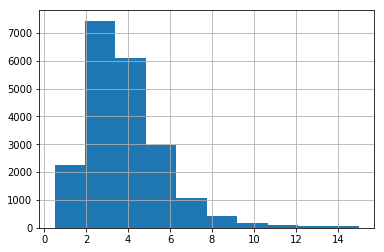

In [349]:
housing["median_income"].hist()

In [350]:
housing["income_cat"]

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

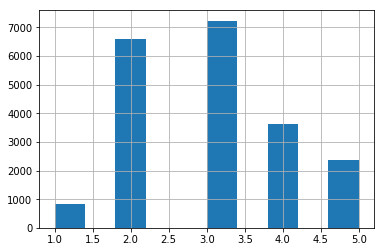

In [351]:
housing["income_cat"].hist()

In [352]:
#Using stratified sampling on data

from sklearn.model_selection import StratifiedShuffleSplit as strat_sampling

split= strat_sampling(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [353]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [354]:
#Check the median_income of the test, train data with actual data

#Now samnpling is done, remove the income_cat variable

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [355]:
#Visualize data for insights

housing= strat_train_set.copy()

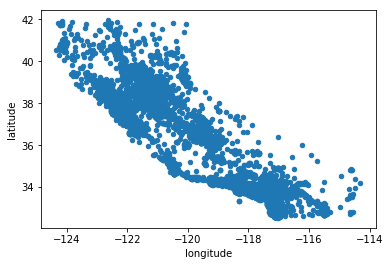

In [356]:
housing.plot(kind="scatter", x="longitude", y="latitude")

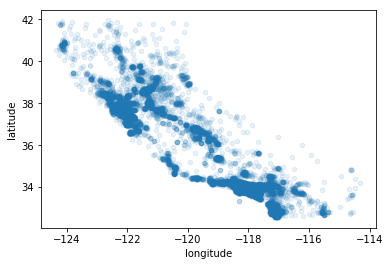

In [357]:
#To check high density data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

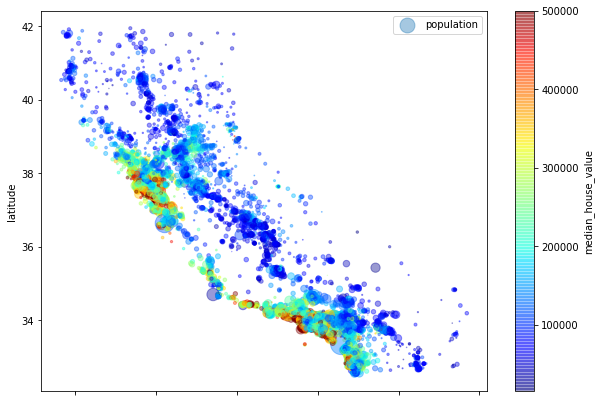

In [358]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/80, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [359]:
#Check Pearson's correlation coefficient

corr_matrix= housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924921           -0.112665     0.050941   
latitude            -0.924921  1.000000            0.014315    -0.043837   
housing_median_age  -0.112665  0.014315            1.000000    -0.359919   
total_rooms          0.050941 -0.043837           -0.359919     1.000000   
total_bedrooms       0.077582 -0.075947           -0.318752     0.930007   
population           0.104286 -0.115009           -0.292876     0.858232   
households           0.063649 -0.080705           -0.301870     0.918009   
median_income       -0.019108 -0.076949           -0.114284     0.196149   
median_house_value  -0.046048 -0.144789            0.110739     0.135447   

                    total_bedrooms  population  households  median_income  \
longitude                 0.077582    0.104286    0.063649      -0.019108   
latitude                 -0.075947   -0.115009   -0.080705      -0.076949   
housing_

In [360]:
print(corr_matrix["median_house_value"].sort_values(ascending=True))

latitude             -0.144789
longitude            -0.046048
population           -0.022356
total_bedrooms        0.050304
households            0.067613
housing_median_age    0.110739
total_rooms           0.135447
median_income         0.688853
median_house_value    1.000000
Name: median_house_value, dtype: float64


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD82051828>,
      dtype=object)

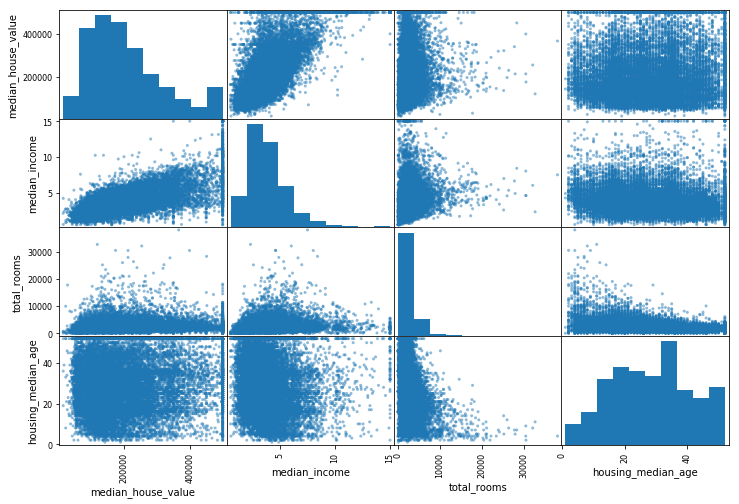

In [361]:
#Check correlation using Pandas' scatter matrix

from pandas.tools.plotting import scatter_matrix

attributes= ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

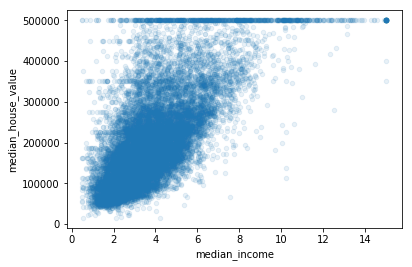

In [362]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [363]:
housing["rooms_per_household"]= housing["total_rooms"]/ housing["population"]
housing["bedrooms_per_room"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= np.ceil(housing["population"]/housing["households"])

In [364]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

bedrooms_per_room          -0.259620
latitude                   -0.144789
longitude                  -0.046048
population_per_household   -0.022484
population                 -0.022356
total_bedrooms              0.050304
households                  0.067613
housing_median_age          0.110739
total_rooms                 0.135447
rooms_per_household         0.207318
median_income               0.688853
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [365]:
#Prepare data for prediction

housing= strat_train_set.drop("median_house_value", axis=1)
housing_labels= strat_train_set["median_house_value"].copy()

In [366]:
#Data Cleaning

#To remove the observations with NA

#housing.dropna(subset=["total_bedrooms"])
# or

#housing.dropna("total_bedrooms", axis=1)

#To impute the missing values with mean/median

median= housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [367]:
#Imputing missing value using Scikit-Learn

from sklearn.preprocessing import Imputer

imputer= Imputer(strategy= "median")

In [368]:
#Imputer can only be applied to Numerical values, so we have to drop "Ocean Proximity" variable

housing_num= housing.drop("ocean_proximity", axis=1)

In [369]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [370]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  435.     ,
       1165.     ,  410.     ,    3.53895])

In [371]:
housing_num.median()

longitude             -118.50000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2127.00000
total_bedrooms         435.00000
population            1165.00000
households             410.00000
median_income            3.53895
dtype: float64

In [372]:
#Using the trained imputer to replace missing values by the learned medians
#In this case, we do not have any missing values though

X= imputer.transform(housing_num)

In [373]:
#We got an array X. Now we will change it to pandas dataframe

housing_tr= pd.DataFrame(X, columns=housing_num.columns)

In [374]:
imputer.strategy

'median'

In [375]:
#Handling Text and categorical data

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
housing_cat= housing["ocean_proximity"]
housing_cat_encoded= encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [376]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [377]:
pd.DataFrame(housing_cat_encoded)

,0
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,4


In [378]:
#The above recoding will asign higher weight to 4(Near Ocean) that 0(<1H Ocean) though they are almost similar

#To tackle this issue, we will use ONE-HOT ENCODING
#It will create one binary attribute per category

#One attribute equals to 1 (hot)
#Others equal to 0 (cold)

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

#One Hot Encoder works on 2D array, ours is an 1D array, so, we will resshape it to 2D
housing_cat_encoded.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [379]:
housing_cat_1hot= encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [380]:
#We got Scipy Sparse matrix
#Need to convert it to dense Numpy array
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [381]:
#previously we applided OneHot Encoding on numeric data (actually categories)
#Now, we will try to OneHot Encode text categories

from sklearn.preprocessing import LabelBinarizer
encoder= LabelBinarizer()
housing_cat_1hot= encoder.fit_transform(housing_cat)
housing_cat_1hot
#Note: We do not need to reshape housing_cat
# and LabelBinarizer converts the sparse matrix to numpy array by default
#To get sparse matrix, pass sparse_output=True in LabelBinarizer() constructor

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [382]:
#Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix= 3,4,5,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household= X[:,rooms_ix]/X[:,household_ix]
        population_per_household= X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

In [383]:
attr_adder= CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_atribs= attr_adder.transform(housing_num.values)
pd.DataFrame(housing_extra_atribs).head()

,0,1,2,3,4,5,6,7,8,9
0,-117.90,33.70,12.0,4695.0,1110.0,2153.0,989.0,4.6483,4.747219,2.176946
1,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,4.662162,4.335586
2,-121.67,40.89,17.0,2548.0,537.0,1118.0,461.0,2.2670,5.527115,2.425163
3,-118.11,34.03,36.0,1493.0,316.0,989.0,293.0,3.5272,5.095563,3.375427
4,-117.97,33.93,35.0,1887.0,328.0,989.0,351.0,4.1321,5.376068,2.817664


In [384]:
housing_extra_atribs= pd.DataFrame(housing_extra_atribs, columns=list(housing_num.columns)+
                                   ["rooms_per_household", "population_per_household"])
housing_extra_atribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,-117.90,33.70,12.0,4695.0,1110.0,2153.0,989.0,4.6483,4.747219,2.176946
1,-119.78,36.75,43.0,2070.0,512.0,1925.0,444.0,1.4635,4.662162,4.335586
2,-121.67,40.89,17.0,2548.0,537.0,1118.0,461.0,2.2670,5.527115,2.425163
3,-118.11,34.03,36.0,1493.0,316.0,989.0,293.0,3.5272,5.095563,3.375427
4,-117.97,33.93,35.0,1887.0,328.0,989.0,351.0,4.1321,5.376068,2.817664


In [385]:
#Featur Scaling

#Normalization- using MinMaxScaler. It has feature_range if we want to change the range from 0-1 to something else
#Standadisation- It is less affected by outliers but does not share output in the range of 0-1. Use StabdardScaler

In [386]:
#Standadisation

from sklearn.preprocessing import StandardScaler#, MimMaxScaler

scaler= StandardScaler()
bed= np.array(housing["total_bedrooms"].copy())
x= scaler.fit_transform(bed.reshape(-1,1))
(pd.DataFrame(x)).describe()

,0
count,1.651200e+04
mean,2.259175e-17
std,1.000030e+00
min,-1.271577e+00
25%,-5.703693e-01
50%,-2.434549e-01
75%,2.516546e-01
max,1.399390e+01


In [387]:
#Normalization

from sklearn.preprocessing import MinMaxScaler

norm= MinMaxScaler(feature_range=(0,1))
x= norm.fit_transform(bed.reshape(-1,1))
(pd.DataFrame(x)).describe()

,0
count,16512.000000
mean,0.083298
std,0.065509
min,0.000000
25%,0.045934
50%,0.067349
75%,0.099783
max,1.000000


In [388]:
housing_num.shape

(16512, 8)